# Multiple Regression using the basic model

In [3]:
album2 <- read.delim("data/Album Sales 2.dat",header=T)

In [4]:
head(album2)

,adverts,sales,airplay,attract
,<dbl>,<int>,<int>,<int>
1,10.256,330,43,10
2,985.685,120,28,7
3,1445.563,360,35,7
4,1188.193,270,33,7
5,574.513,220,44,5
6,568.954,170,19,5


## The First Model

In [5]:
albumSales.2 <- lm(sales ~ adverts, data=album2)
summary(albumSales.2)


Call:
lm(formula = sales ~ adverts, data = album2)

Residuals:
     Min       1Q   Median       3Q      Max 
-152.949  -43.796   -0.393   37.040  211.866 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.341e+02  7.537e+00  17.799   <2e-16 ***
adverts     9.612e-02  9.632e-03   9.979   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 65.99 on 198 degrees of freedom
Multiple R-squared:  0.3346,	Adjusted R-squared:  0.3313 
F-statistic: 99.59 on 1 and 198 DF,  p-value: < 2.2e-16


In [6]:
confint(albumSales.2)

,2.5 %,97.5 %
(Intercept),119.27768082,149.0021948
adverts,0.07712929,0.1151197


## The Second Model

In [7]:
albumSales.3 <- lm(sales ~ adverts + airplay + attract, data = album2)
summary(albumSales.3)


Call:
lm(formula = sales ~ adverts + airplay + attract, data = album2)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.324  -28.336   -0.451   28.967  144.132 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.612958  17.350001  -1.534    0.127    
adverts       0.084885   0.006923  12.261  < 2e-16 ***
airplay       3.367425   0.277771  12.123  < 2e-16 ***
attract      11.086335   2.437849   4.548 9.49e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.09 on 196 degrees of freedom
Multiple R-squared:  0.6647,	Adjusted R-squared:  0.6595 
F-statistic: 129.5 on 3 and 196 DF,  p-value: < 2.2e-16


In [8]:
confint(albumSales.3)

,2.5 %,97.5 %
(Intercept),-60.82960967,7.60369295
adverts,0.07123166,0.09853799
airplay,2.81962186,3.91522848
attract,6.27855218,15.89411823


## Comparing two models using F-ratio(ANOVA)

In [9]:
anova(albumSales.2,albumSales.3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,198,862264.2,NA,NA,NA,NA
2,196,434574.6,2,427689.6,96.44738,6.879395e-30


## Casewise diagnostics (Residual and influence statistics)

### Calucate the diagnostics

In [10]:
album2$residuals<-resid(albumSales.3)
album2$standardized.residuals <- rstandard(albumSales.3)
album2$studentized.residuals <- rstudent(albumSales.3)
album2$cooks.distance <- cooks.distance(albumSales.3)
album2$dfbeta <- dfbeta(albumSales.3)
album2$dffits <- dffits(albumSales.3)
album2$leverage <- hatvalues(albumSales.3)
album2$covariance.ratios <- covratio(albumSales.3)

head(album2)

,adverts,sales,airplay,attract,residuals,standardized.residuals,studentized.residuals,cooks.distance,dfbeta,dffits,leverage,covariance.ratios
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,4]>",<dbl>,<dbl>,<dbl>
1,10.256,330,43,10,100.079745,2.1774041,2.1985963,5.870388e-02,"-5.42182707, -1.661591e-03, 0.0433929166, 0.8529699235",0.48929398,0.047190526,0.9712750
2,985.685,120,28,7,-108.948992,-2.3230828,-2.3497237,1.088943e-02,"0.21601702, -8.649690e-04, 0.0025870806, -0.0450304095",-0.21109830,0.008006536,0.9201832
3,1445.563,360,35,7,68.442368,1.4688016,1.4731799,1.140066e-02,"-0.65851797, 1.207436e-03, 0.0128983716, -0.0130879018",0.21418431,0.020700427,0.9971100
4,1188.193,270,33,7,7.024026,0.1501160,0.1497411,7.166478e-05,"-0.04480869, 8.441700e-05, 0.0009589848, 0.0003156056",0.01688873,0.012560946,1.0331795
5,574.513,220,44,5,-5.752861,-0.1237983,-0.1234870,1.025423e-04,"-0.14928350, 7.552860e-06, -0.0039693382, 0.0331263834",-0.02020169,0.026065319,1.0476595
6,568.954,170,19,5,28.904643,0.6182597,0.6172827,1.377347e-03,"1.14345654, 1.554094e-05, -0.0057924331, -0.1251265742",0.07410797,0.014208449,1.0273290


### Check the assumption of normally distributed residuals

The linear regression model assumes that the residuals is independent and normal distributed. So if the **Sandardized residuals** was not normally distributed, the model is poor.

#### plots of residuals

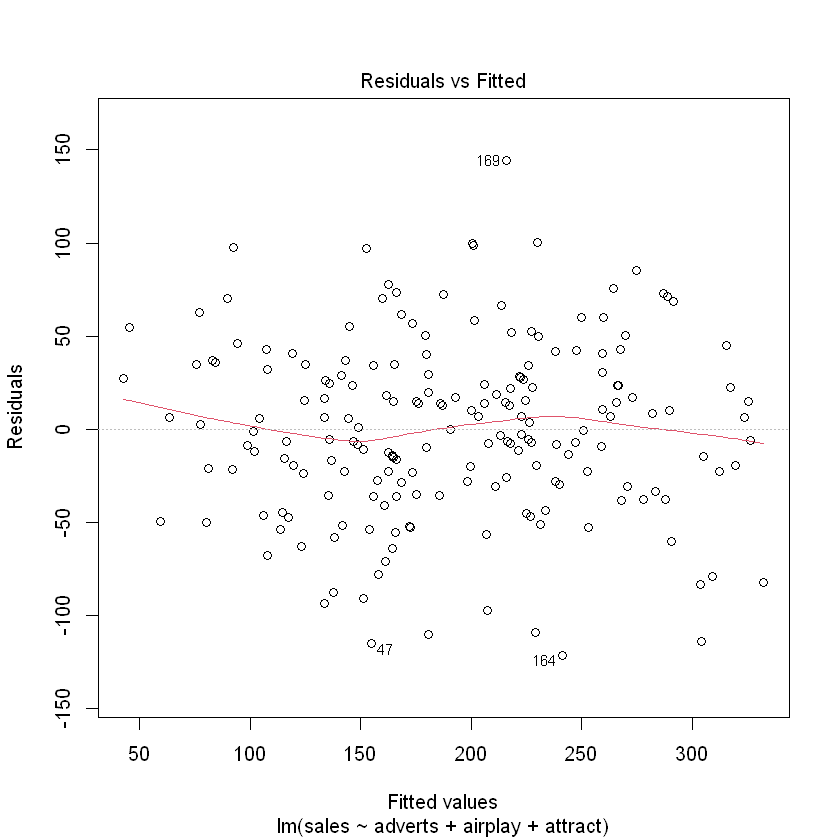

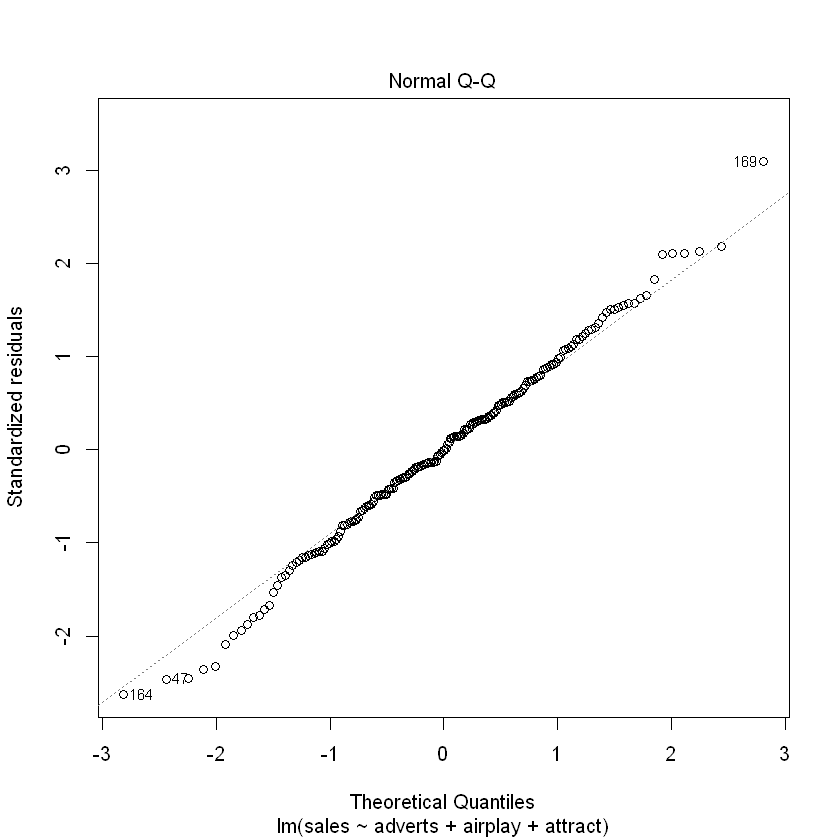

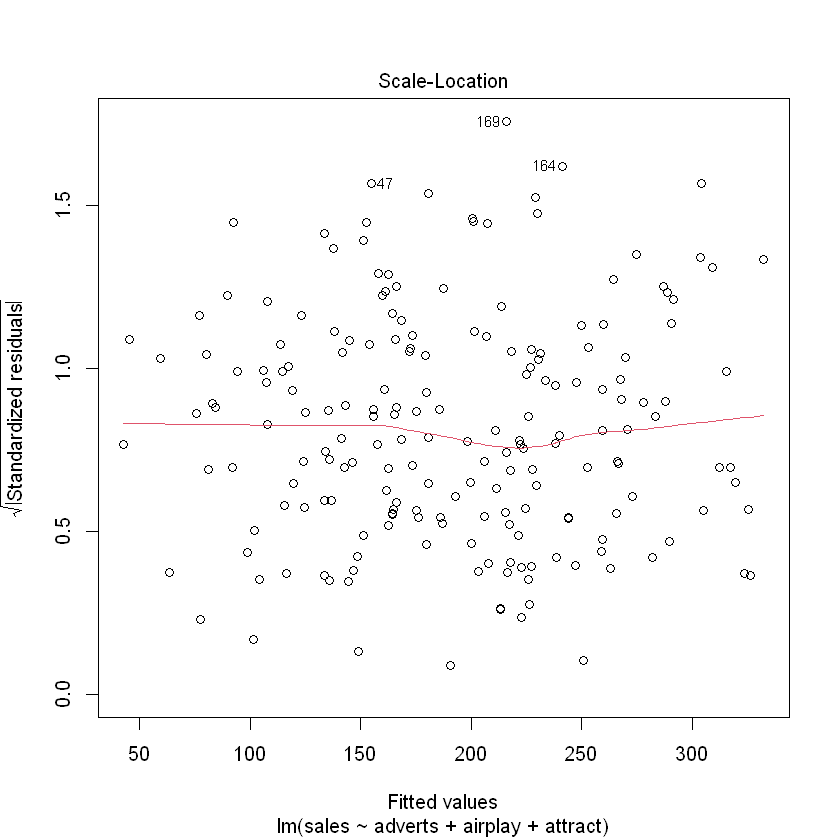

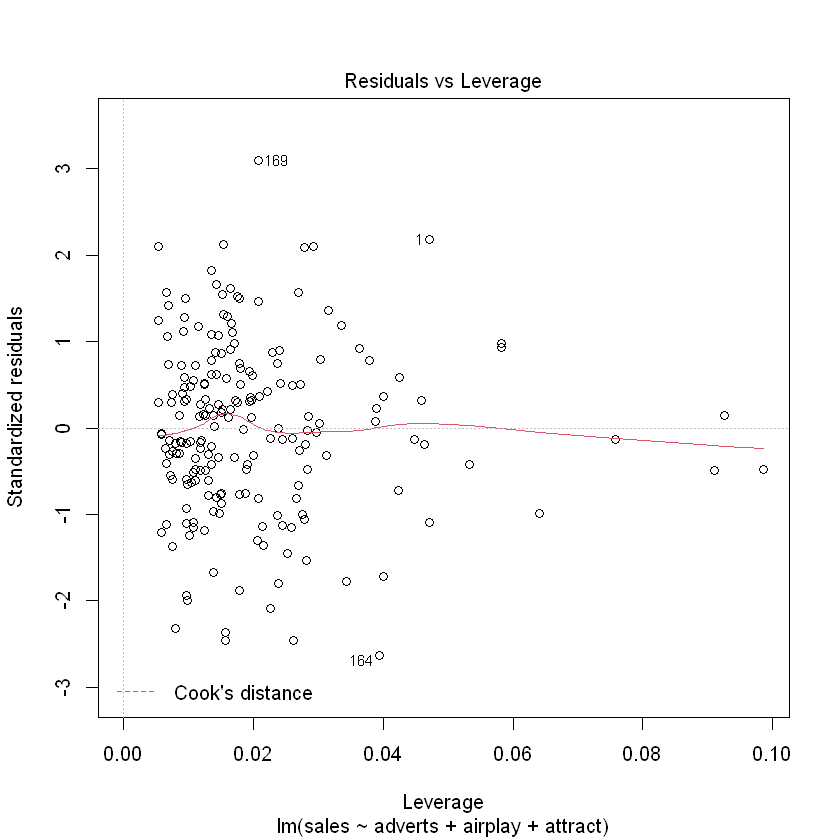

In [11]:
plot(albumSales.3)

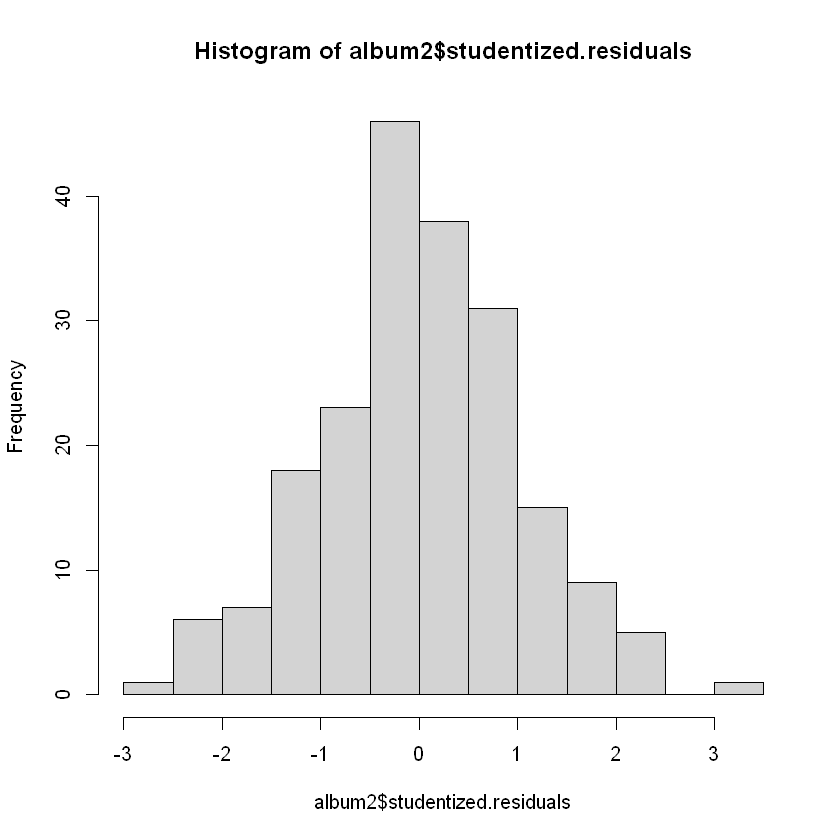

In [12]:
hist(album2$studentized.residuals)

### Find outliers using residuals

In [13]:
album2$large.residual <- album2$standardized.residuals > 2 | album2$standardized.residual < -2 
sum(album2$large.residual)

[1] 12

In [14]:
album2[album2$large.residual,c("sales","airplay","attract","adverts","standardized.residuals","cooks.distance","leverage","covariance.ratios")]

,sales,airplay,attract,adverts,standardized.residuals,cooks.distance,leverage,covariance.ratios
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,330,43,10,10.256,2.177404,0.058703882,0.047190526,0.9712750
2,120,28,7,985.685,-2.323083,0.010889432,0.008006536,0.9201832
10,300,40,7,174.093,2.130289,0.017756472,0.015409738,0.9439200
47,40,25,8,102.568,-2.460996,0.024115188,0.015677123,0.9145800
52,190,12,4,405.913,2.099446,0.033159177,0.029213132,0.9599533
55,190,33,8,1542.329,-2.455913,0.040415897,0.026103520,0.9248580
61,300,30,7,579.321,2.104079,0.005948358,0.005345708,0.9365377
68,70,37,7,56.895,-2.363549,0.022288983,0.015708852,0.9236983
100,250,5,7,1000.000,2.095399,0.031364021,0.027779409,0.9588774


### Find outliers using other measures

**Cook's distance** is a measure of the overall influence of a case on the medal. Values **greater than 1** may be cause for concern.

In [17]:
sum(album2$cooks.distance>1)

[1] 0

**leverage (hat values)** gauge the influence of the observed value of the outcome variable over the predicted values.

* 0 indicates that the case has no influence whatsover.
* 1 indicates that the case has complete influence over predicition.

The average leverage value is defined as $(k+1)/n$ 
in which $k$ is **the number of predicators(independt variables)** and $n$ is **the number of participants**.


Values greater than three or two times of the average value are signs for influencial data points.

In [ ]:
**DFBeta** calculates the difference between a parameter estimated using all cases and estimated when that one case is excluded.

**DFFit is the difference bwtween the predicted value for a case when the model is calculated including that case and when the model is calculated excluding that case.

## Accessing the assumption of independent errors (using Durbin-Waston test)

In [26]:
library(car)
dwt(albumSales.3)

Warning message:
"package 'car' was built under R version 4.0.2"
Loading required package: carData



 lag Autocorrelation D-W Statistic p-value
   1       0.0026951      1.949819   0.732
 Alternative hypothesis: rho != 0

**D-W statistic** 0 means perfect positive autocorrection , 2 no autocorrelation 4, perfect negative autocorrection

## assessing the assumption of no multicollinearity

In [27]:
vif(albumSales.3)

adverts  airplay  attract 
1.014593 1.042504 1.038455

* the lagest VIF is greater than 10 then there is cause for concern
* the average VIF is substantially greater than 1 then the regression may be biased